# Descriptive statistics problems

### Exercise 1

We will use Numpy to obtain information to describe statistically.

- Generate an array of 100 elements following a normal distribution.
- Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
- Calculate the main metrics and statistical measures that best describe the two vectors.

,Nombre,Media,Std_Dev,Mediana,Moda,Varianza,Asimetria,Curtosis,Rango,IQ_Range
0,Distribucion Xsquare con 100 valores,2.688257,2.208769,2.157594,"(0.16451002973015527, 1)",4.878660,1.396669,1.860894,10.389742,2.857993
1,Distribucion normal con 100 valores,0.049297,0.979274,0.202151,"(-2.3442434380432764, 1)",0.958977,-0.436033,-0.257979,4.342291,1.132894
2,Distribucion Xsquare con 10.000 valores,2.949378,2.425448,2.314903,"(0.0012673835824173463, 1)",5.882798,1.654954,4.150497,21.221292,2.894021
3,Distribucion normal con 10.000 valores,0.010745,1.007820,-0.001179,"(-3.7897601927918627, 1)",1.015701,0.017075,-0.002707,7.530951,1.346309


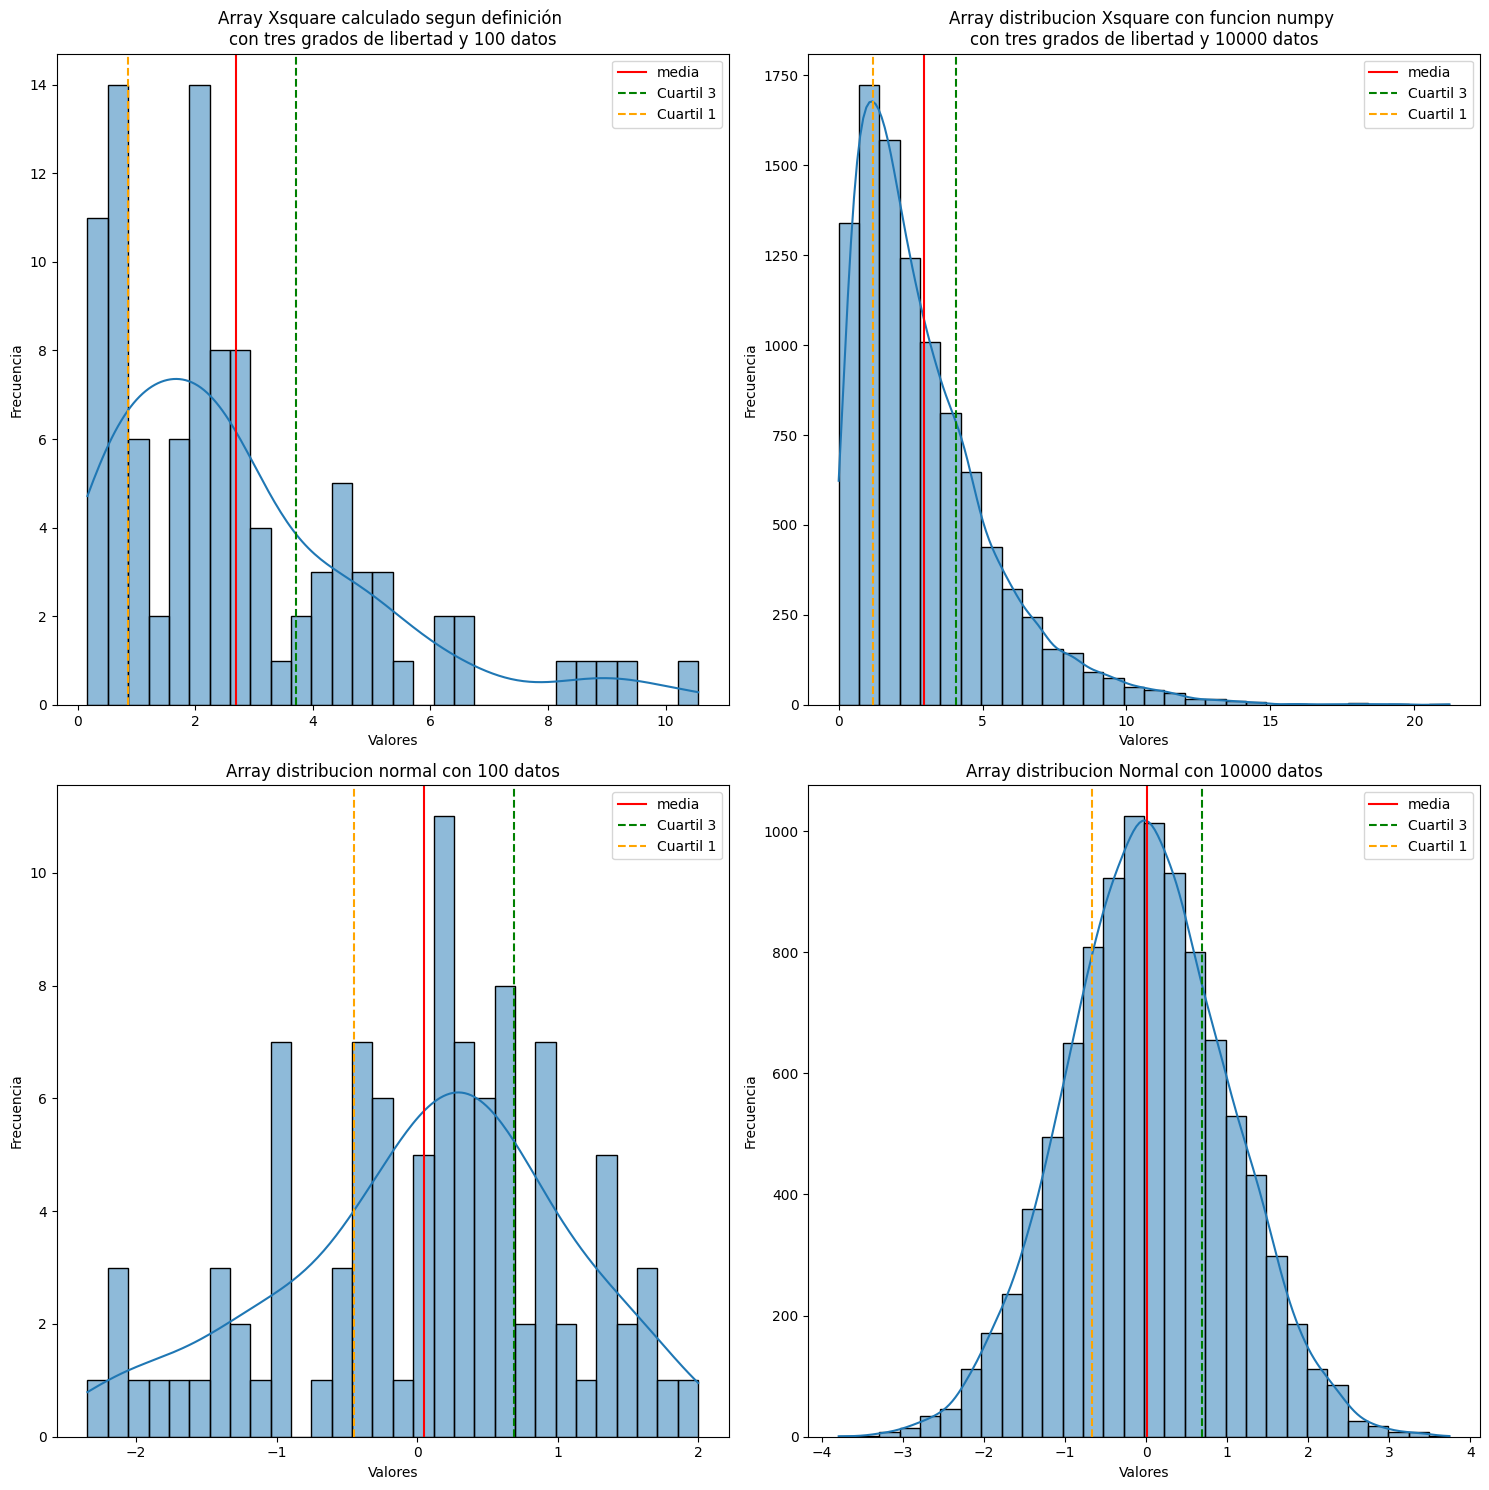

In [7]:
# se importan las librerias que utilizaremos
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis


#DISTRIBUCION NORMAL

###############################################################################################################################################
#creamos un array de numpy con el metodo randn que devuelve una distribucion normal con 100 valores
normal_distribution_array = np.random.randn(100)

#Calculo de primer y tercer cuantil
q3_normal = np.percentile (normal_distribution_array, [75])
q1_normal = np.percentile (normal_distribution_array, [25])


#Se crea un segundo array con distribución Normal para comparar la distribucion con 100 elementos frente a otras.

normal_distribution_array_plus = np.random.randn(10000)

#Calculo de primer y tercer cuantil
q3_normal_plus = np.percentile (normal_distribution_array_plus, [75])
q1_normal_plus = np.percentile (normal_distribution_array_plus, [25])


#DISTRIBUCION XSQUARE

###################################################################

''' creamos un array de numpy "a mano" buscando una distribucion Xsquare siguiendo su definicion //"es la distribución de la suma del cuadrado de 
 (k) variables aleatorias independientes con distribución normal estándar, con k grados de libertad " De esta forma espero poder entender mejor el concepto'''

#creamos tres arrays con distribucion normal aleatoria de 100 valores
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

#Seguimos la definición para calcular el array con distribución Xcuadrado sumando las tres variables aleatorias elevadas al cuadrado
chi_square_vector = (x**2+y**2+z**2)

#Calculo de primer y tercer cuantil XSquare
q3_xsquare = np.percentile (chi_square_vector, [75])
q1_xsquare = np.percentile (chi_square_vector, [25])


#Se crea un segundo array con distribución Xsquare, esta vez con la funcion especifica de Numpy para comparar la diustribucion con 100 elementos frente a otras
chi_square_vector_plus = np.random.chisquare(3, 10000)
q3_xsquare_plus = np.percentile (chi_square_vector_plus, [75])
q1_xsquare_plus = np.percentile (chi_square_vector_plus, [25])

########################################################################


#Se define una funcion para hallar las metricas y datos estadisticos mas relevantes de los dos vectores
def metricas(array, nombre):
    mean = np.mean(array)                           # promedio de valores
    std_dev = np.std(array)                         # media de variacion de valores entorno a la media
    mediana = np.median(array)                      # el valor que divide los datos por la mitad
    moda = scipy.stats.mode(array)                  # el valor mas frecuente(pueden ser varios?)
    varianza = np.var(array)                        # cuadrado de la std
    Asimetria = scipy.stats.skew(array)             # simetria en la distribucion de datos(en distribucion normal debe ser 0)
    curtosis = scipy.stats.kurtosis(array)          # mide la concentracion de datos(leptocurtico:pico fino y elevado/ mesocurtico:normal / platicurtica: ancha , baja concentracion de valores en torno a la media )
    range = np.amax(array) - np.amin(array)         # distancia entre el maximo y el minimo
    q3, q1 = np.percentile (array, [75, 25])        # cuartiles: division de la muestra de datos es 4 partes iguales// el 75% es menor al 3er cuartil y el 25% es menor al 1er cuartil
    iqr = q3 - q1                                   #plt.hist(np.random.randn(10000, 1), bins=100)rango intercuartilico: compuesto del 50% de los datos que se encuentran en mitad de la muestra
    

    #el retorno de valores a un diccionario permitira crear un Dataframe con los resultados de forma sencilla
    return {
        'Nombre': nombre,
        'Media': mean,
        'Std_Dev': std_dev,
        'Mediana': mediana,
        'Moda': moda,
        'Varianza': varianza,
        'Asimetria': Asimetria,
        'Curtosis': curtosis,
        'Rango': range,
        'IQ_Range': iqr
    }
    
#Lista vacia que recibira los resultados de la funcion llamada en el bucle for
resultados = []

#Lista con los arrays sobre la que iterara el bucle for
arrays = [chi_square_vector,normal_distribution_array,chi_square_vector_plus,normal_distribution_array_plus]
#nombre que quiero que se muestre para cada array
nombres = ['Distribucion Xsquare con 100 valores',
           'Distribucion normal con 100 valores',
           'Distribucion Xsquare con 10.000 valores',
           'Distribucion normal con 10.000 valores']

# la funcion Zip itera alternativamente primera y segunda lista en el mismo orden
for array, nombre in zip(arrays, nombres):

    #La variable resultado recoge el return de la funcion metricas
    resultado = metricas(array, nombre)
    #Resultado se incluye en la lista resultados
    resultados.append(resultado)
    #vuelta a empezar hasta len(lista mas corta)

#La lista resultados se transforma en un dataframe
df_resultados = pd.DataFrame(resultados)


display(df_resultados)


#Se grafican los resultados

# Se genera un grid de 4 graficos

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Histogramas para XSquare 'manual' y Xsquare (numpy)
sns.histplot(chi_square_vector, kde=True, bins=30, ax=axs[0, 0])
axs[0, 0].set_title('''Array Xsquare calculado segun definición 
con tres grados de libertad y 100 datos''')
axs[0, 0].axvline(x=np.mean(chi_square_vector), ymin = 0, ymax = 1, color='red', label='media')
axs[0, 0].axvline(x=q3_xsquare, ymin = 0, ymax = 1, color='green', linestyle='--', label='Cuartil 3')
axs[0, 0].axvline(x=q1_xsquare, ymin = 0, ymax = 1, color='orange', linestyle='--', label='Cuartil 1')
axs[0, 0].set_xlabel('Valores')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].legend()

sns.histplot(chi_square_vector_plus, kde=True, bins=30, ax=axs[0, 1])
axs[0, 1].set_title('''Array distribucion Xsquare con funcion numpy 
con tres grados de libertad y 10000 datos''')
axs[0, 1].axvline(x=np.mean(chi_square_vector_plus), ymin = 0, ymax = 1, color='red', label='media')
axs[0, 1].axvline(x=q3_xsquare_plus, ymin = 0, ymax = 1, color='green', linestyle='--', label='Cuartil 3')
axs[0, 1].axvline(x=q1_xsquare_plus, ymin = 0, ymax = 1, color='orange', linestyle='--', label='Cuartil 1')
axs[0, 1].set_xlabel('Valores')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].legend()

# Histogramas para Normal 100 y Normal 10000 datos
sns.histplot(normal_distribution_array, kde=True, bins=30, ax=axs[1, 0])
axs[1, 0].set_title('Array distribucion normal con 100 datos')
axs[1, 0].axvline(x=np.mean(normal_distribution_array), ymin = 0, ymax = 1, color='red', label='media')
axs[1, 0].axvline(x=q3_normal, ymin = 0, ymax = 1, color='green', linestyle='--', label='Cuartil 3')
axs[1, 0].axvline(x=q1_normal, ymin = 0, ymax = 1, color='orange', linestyle='--', label='Cuartil 1')
axs[1, 0].set_xlabel('Valores')
axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].legend()
plt.tight_layout()


sns.histplot(normal_distribution_array_plus, kde=True, bins=30, ax=axs[1,1])
axs[1, 1].set_title('Array distribucion Normal con 10000 datos')
axs[1, 1].axvline(x=np.mean(normal_distribution_array_plus), ymin = 0, ymax = 1, color='red', label='media')
axs[1, 1].axvline(x=q3_normal_plus, ymin = 0, ymax = 1, color='green', linestyle='--', label='Cuartil 3' )
axs[1, 1].axvline(x=q1_normal_plus, ymin = 0, ymax = 1, color='orange', linestyle='--', label='Cuartil 1')
axs[1, 1].set_xlabel('Valores')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].legend()
plt.tight_layout()


plt.show()


### Conclusión 

 Se puede observar una clara diferencia entre los gráficos de la izquierda con solo 100 datos y los gráficos de la derecha en los que se han incluido 10000 valores.
 
 Cuando se aumenta el número de valores la gráfica se ajusta cada vez más a la definición formal de cada una de las distribuciones.

### Exercise 2

Write a Python program to calculate the standard deviation of the following data:

```py
data = [4, 2, 5, 8, 6]
```

In [3]:
data = [4, 2, 5, 8, 6]

#definimos una función basandonos en la ecuación que describe la desviación estandar: 
def std_dev(data):
  media = np.mean(data)
  n_valores = len(data)
  suma_dif_al_cuadrado = np.sum((data - media)**2)    #la ecuacion requiere restar cada uno de los valores a la media,  elevarlos al cuadrado y sumarlos // eso es el dividendo de la ecuación
  return np.sqrt(suma_dif_al_cuadrado/n_valores)      #obtenido el dividendo se ha de calcular la raiz cuadrada de éste dividido por el numero de valores de la muestra de datos
  
print(f' la desviación media de la muestra es {std_dev(data)}')



 la desviación media de la muestra es 2.0
